### Data Wrangling and Cleaning

In [1]:
# Import our libraries
import opendatasets as od
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calmap

In [2]:
od.version()

'0.1.22'

In [3]:
#Get dataset url
dataset = 'https://www.kaggle.com/competitions/predict-west-nile-virus/data'

In [4]:
#Download from Kaggle
od.download(dataset)

Skipping, found downloaded files in "./predict-west-nile-virus" (use force=True to force download)


In [5]:
data_dir = './predict-west-nile-virus/'

In [6]:
os.listdir(data_dir)

['mapdata_copyright_openstreetmap_contributors.rds',
 'west_nile.zip',
 '.DS_Store',
 'mapdata_copyright_openstreetmap_contributors.txt.zip',
 'sampleSubmission.csv.zip',
 'spray.csv.zip',
 'test.csv.zip',
 'train.csv.zip',
 'noaa_weather_qclcd_documentation.pdf',
 'weather.csv.zip']

In [7]:
#Get the CSVs
train_csv = data_dir + '/train.csv.zip'
test_csv = data_dir + '/test.csv.zip'
weather_csv = data_dir + '/weather.csv.zip'
spray_csv = data_dir + '/spray.csv.zip'
submission_csv = data_dir + '/sampleSubmission.csv.zip'

In [8]:
#Read in the CSVs
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)
weather_df = pd.read_csv(weather_csv)
spray_df = pd.read_csv(spray_csv)
submission_df = pd.read_csv(submission_csv)

In [9]:
#Ensure we can view all of our features
pd.set_option('display.max_columns', None)

# Spray Data

In [10]:
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [11]:
#Convert date object to datetime
spray_df['Date'] = pd.to_datetime(spray_df['Date'])

In [12]:
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [13]:
#Let's see what percent of entries are missing
missing = pd.concat([spray_df.isnull().sum(), 100 * spray_df.isnull().mean()], axis = 1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Time,584,3.936636
Date,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000


In [14]:
spray_df[spray_df['Time'].isna()]

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615
1610,2011-09-07,NaN,41.995972,-87.810271
1611,2011-09-07,NaN,41.995684,-87.810319
1612,2011-09-07,NaN,41.994724,-87.810415


In [15]:
#Let's forward fill the spray times
spray_df['Time'].fillna(method='ffill', inplace=True)

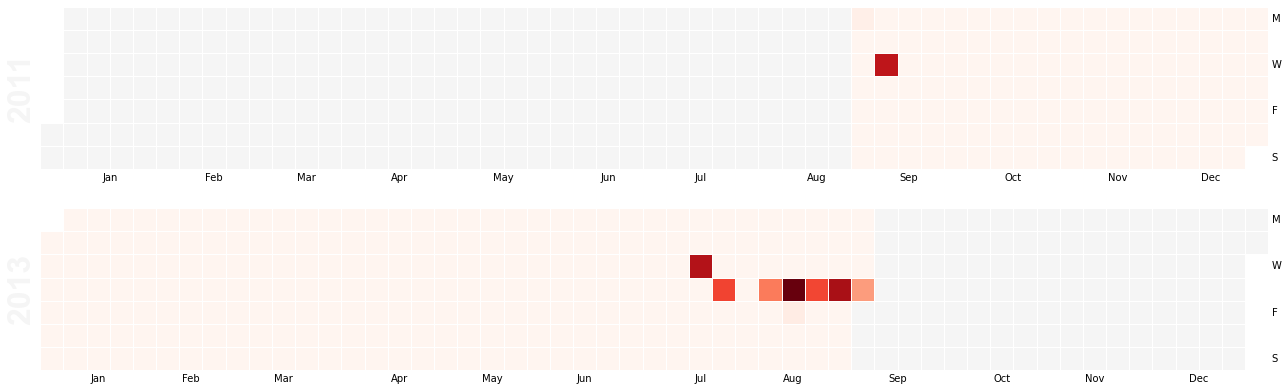

In [16]:
#Let's visualize the spray maybe use, maybe don't
days = spray_df.Date.values
events = pd.Series(np.ones(len(days)), index=days)
fig=calmap.calendarplot(events,daylabels='MTWTFSS',monthticks=1,
                        dayticks=[0, 2, 4, 6],
                        yearlabels=True, 
                        yearascending=True,
                        fig_kws={'figsize':(18,6)})

## We will not ue the spray data for our model.

#### The spray data is only available for two years, took place only in specific regions, and did not take place during the time frame for which we need to make our predictions. This, in essence, is a dataset with a significant amount of data that cannot be reasonably imputed.

# Weather Data

In [17]:
weather_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [18]:
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


### Let's replace missing values: 'M,' 'T,' and '-'

In [19]:
weather_df.replace('M', np.nan, inplace=True)

In [20]:
#Replace '  T' for trace values with 0.01 because it's not zero, but not measurable
weather_df.replace('  T', 0.01, inplace=True)

In [21]:
#Replace - with NaN so we can later fill
weather_df.replace('-', np.nan, inplace=True)

In [22]:
#Let's see what percent of values are missing
missing = pd.concat([weather_df.isnull().sum(), 100 * weather_df.isnull().mean()], axis = 1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Water1,2944,100.000000
Sunset,1472,50.000000
Depth,1472,50.000000
Depart,1472,50.000000
SnowFall,1472,50.000000
Sunrise,1472,50.000000
Tavg,11,0.373641
Heat,11,0.373641
Cool,11,0.373641
SeaLevel,9,0.305707


### Date

In [23]:
#Change date object to datetime
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

### Tavg

In [24]:
#Let's see the entries rows
weather_df[weather_df['Tavg'].isna()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,NaN,NaN,42,50,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,NaN,NaN,68,71,NaN,NaN,NaN,NaN,TS RA,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,NaN,NaN,41,47,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,NaN,NaN,70,74,NaN,NaN,NaN,NaN,TS TSRA BR,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,NaN,NaN,51,61,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,NaN,NaN,39,45,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,NaN,NaN,48,54,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,NaN,NaN,48,54,NaN,NaN,NaN,NaN,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,NaN,NaN,44,50,NaN,NaN,NaN,NaN,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,NaN,NaN,43,47,NaN,NaN,NaN,NaN,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


In [25]:
#Replace NaN for Tavg with avg of Tmax and Tmin
weather_df['Tavg'] = (weather_df['Tmax'] + weather_df['Tmin']) / 2

### Depart

In [26]:
#Let's see the missing entries
weather_df[weather_df['Depart'].isna()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2,2007-05-01,84,52,68.0,NaN,51,57,0,3,NaN,NaN,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60,43,51.5,NaN,42,47,13,0,NaN,NaN,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67,48,57.5,NaN,40,50,7,0,NaN,NaN,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78,51,64.5,NaN,42,50,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66,54,60.0,NaN,39,50,5,0,NaN,NaN,,NaN,NaN,NaN,0.01,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79,54,66.5,NaN,52,59,0,2,NaN,NaN,RA,NaN,NaN,NaN,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66,48,57.0,NaN,40,48,8,0,NaN,NaN,RA,NaN,NaN,NaN,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49,40,44.5,NaN,34,42,20,0,NaN,NaN,,NaN,NaN,NaN,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53,37,45.0,NaN,35,42,20,0,NaN,NaN,RA,NaN,NaN,NaN,0.01,29.41,30.10,5.9,23,6.5


In [27]:
#Looks like nothing was recorded for station 2. The value for station 1 is probably a close approximation, so let's use that to fill.
weather_df['Depart'].fillna(method='ffill', inplace=True)

### WetBulb

In [28]:
#Let's see the missing entries
weather_df[weather_df['WetBulb'].isna()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
848,1,2009-06-26,86,69,77.5,7,60,NaN,0,13,0418,1931,,0,NaN,0.0,0.00,NaN,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,72.5,0,57,NaN,0,8,0454,1900,,0,NaN,0.0,0.00,NaN,30.08,5.3,5,6.5
2412,1,2013-08-11,81,60,70.5,-2,61,NaN,0,6,0455,1859,RA,0,NaN,0.0,0.01,29.35,30.07,2.0,27,3.0
2415,2,2013-08-12,85,69,77.0,2,63,NaN,0,12,NaN,NaN,RA,NaN,NaN,NaN,0.66,29.27,29.92,4.5,26,7.7


In [29]:
#I'll backfill here.
weather_df['WetBulb'].fillna(method='bfill', inplace=True)

### Heat and Cool

In [30]:
#Let's see the missing values for both columns.
weather_df[weather_df['Heat'].isna()]


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,64.5,4,42,50,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66.0,5,68,71,NaN,NaN,NaN,NaN,TS RA,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54.0,-4,41,47,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,85.5,5,70,74,NaN,NaN,NaN,NaN,TS TSRA BR,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78.0,-1,51,61,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,56.5,-5,39,45,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,71.5,-1,48,54,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,68.5,1,48,54,NaN,NaN,NaN,NaN,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,62.0,-1,44,50,NaN,NaN,NaN,NaN,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,63.5,-4,43,47,NaN,NaN,NaN,NaN,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


In [31]:
weather_df[weather_df['Cool'].isna()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,64.5,4,42,50,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66.0,5,68,71,NaN,NaN,NaN,NaN,TS RA,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54.0,-4,41,47,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,85.5,5,70,74,NaN,NaN,NaN,NaN,TS TSRA BR,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78.0,-1,51,61,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,56.5,-5,39,45,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,71.5,-1,48,54,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,68.5,1,48,54,NaN,NaN,NaN,NaN,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,62.0,-1,44,50,NaN,NaN,NaN,NaN,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,63.5,-4,43,47,NaN,NaN,NaN,NaN,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


In [32]:
#Station 2 data missing. Let's forward fill with data from station 1 as it's a close approximation.
weather_df['Heat'].fillna(method='ffill', inplace=True)



In [33]:
weather_df['Cool'].fillna(method='ffill', inplace=True)


### Sunrise and Sunset

In [34]:
#Let's see what entries are missing.
weather_df[weather_df['Sunrise'].isna()]


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2,2007-05-01,84,52,68.0,14,51,57,0,3,NaN,NaN,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60,43,51.5,-3,42,47,13,0,NaN,NaN,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67,48,57.5,2,40,50,7,0,NaN,NaN,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78,51,64.5,4,42,50,7,0,NaN,NaN,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66,54,60.0,5,39,50,5,0,NaN,NaN,,NaN,NaN,NaN,0.01,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79,54,66.5,16,52,59,0,2,NaN,NaN,RA,NaN,NaN,NaN,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66,48,57.0,10,40,48,8,0,NaN,NaN,RA,NaN,NaN,NaN,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49,40,44.5,-4,34,42,20,0,NaN,NaN,,NaN,NaN,NaN,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53,37,45.0,-4,35,42,20,0,NaN,NaN,RA,NaN,NaN,NaN,0.01,29.41,30.10,5.9,23,6.5


In [35]:
#Again, all station 2 unrecorded. Let's fill station 2's sunrise data with the same as station 1 for that day.
weather_df['Sunrise'].fillna(method='ffill', inplace=True)


In [36]:
weather_df[weather_df['Sunset'].isna()]


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2,2007-05-01,84,52,68.0,14,51,57,0,3,0448,NaN,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60,43,51.5,-3,42,47,13,0,0447,NaN,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67,48,57.5,2,40,50,7,0,0446,NaN,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78,51,64.5,4,42,50,7,0,0444,NaN,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66,54,60.0,5,39,50,5,0,0443,NaN,,NaN,NaN,NaN,0.01,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79,54,66.5,16,52,59,0,2,0618,NaN,RA,NaN,NaN,NaN,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66,48,57.0,10,40,48,8,0,0619,NaN,RA,NaN,NaN,NaN,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49,40,44.5,-4,34,42,20,0,0620,NaN,,NaN,NaN,NaN,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53,37,45.0,-4,35,42,20,0,0622,NaN,RA,NaN,NaN,NaN,0.01,29.41,30.10,5.9,23,6.5


In [37]:
#Let's do the same for Sunset
weather_df['Sunset'].fillna(method='ffill', inplace=True)


### Depth

In [38]:
#Let's see this missing entries
weather_df[weather_df['Depth'].isna()]


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2,2007-05-01,84,52,68.0,14,51,57,0,3,0448,1849,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60,43,51.5,-3,42,47,13,0,0447,1850,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67,48,57.5,2,40,50,7,0,0446,1851,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78,51,64.5,4,42,50,7,0,0444,1852,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66,54,60.0,5,39,50,5,0,0443,1853,,NaN,NaN,NaN,0.01,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79,54,66.5,16,52,59,0,2,0618,1653,RA,NaN,NaN,NaN,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66,48,57.0,10,40,48,8,0,0619,1651,RA,NaN,NaN,NaN,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49,40,44.5,-4,34,42,20,0,0620,1650,,NaN,NaN,NaN,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53,37,45.0,-4,35,42,20,0,0622,1649,RA,NaN,NaN,NaN,0.01,29.41,30.10,5.9,23,6.5


In [39]:
weather_df['Depth'].unique()


array(['0', nan], dtype=object)

In [40]:
#50% 0 and 50% NaN values, across both station 1 and station 2. We should drop this column.
weather_df = weather_df.drop('Depth', axis=1)


### Water1

In [41]:
#Let's see the missing entries
weather_df[weather_df['Water1'].isna()]


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,66.5,14,51,56,0,2,0448,1849,,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,14,51,57,0,3,0448,1849,,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,50.5,-3,42,47,14,0,0447,1850,BR,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,51.5,-3,42,47,13,0,0447,1850,BR HZ,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2,40,48,9,0,0446,1851,,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,44.5,-4,34,42,20,0,0620,1650,,NaN,NaN,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,41.5,-4,34,40,23,0,0622,1649,,NaN,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45.0,-4,35,42,20,0,0622,1649,RA,NaN,NaN,0.01,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40.0,-6,25,33,25,0,0623,1647,RA SN,NaN,0.1,0.03,29.49,30.20,22.6,34,22.9


In [42]:
#Everything is NaN. We should drop this column.
weather_df = weather_df.drop('Water1', axis=1)

### Snowfall

In [43]:
#Let's see the missing entries
weather_df[weather_df['SnowFall'].isna()]


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2,2007-05-01,84,52,68.0,14,51,57,0,3,0448,1849,,NaN,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60,43,51.5,-3,42,47,13,0,0447,1850,BR HZ,NaN,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67,48,57.5,2,40,50,7,0,0446,1851,HZ,NaN,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78,51,64.5,4,42,50,7,0,0444,1852,,NaN,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66,54,60.0,5,39,50,5,0,0443,1853,,NaN,0.01,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79,54,66.5,16,52,59,0,2,0618,1653,RA,NaN,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66,48,57.0,10,40,48,8,0,0619,1651,RA,NaN,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49,40,44.5,-4,34,42,20,0,0620,1650,,NaN,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53,37,45.0,-4,35,42,20,0,0622,1649,RA,NaN,0.01,29.41,30.10,5.9,23,6.5


In [44]:
#There doesn't seem to be much unique, valuable data here.
weather_df['SnowFall'].unique()


array(['0.0', nan, 0.01, '0.1'], dtype=object)

In [45]:
#There are many missing, zero, and small values here. We should drop this column
weather_df = weather_df.drop('SnowFall', axis=1)

### PrecipTotal

In [46]:
#Let's see the missing entries
weather_df[weather_df['PrecipTotal'].isna()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
117,2,2007-06-28,73,61,67.0,-5,56,61,0,2,0419,1931,,NaN,29.43,30.07,12.2,2,13.3
119,2,2007-06-29,71,56,63.5,-8,56,60,1,0,0419,1931,,NaN,29.47,30.11,7.4,2,8.2


In [47]:
#Only data from station 2 is missing. It's likely similar to station 1, so we'll use that to forward fill.
weather_df['PrecipTotal'].fillna(method='ffill', inplace=True)

### StnPressure

In [48]:
#Let's see the missing entries
weather_df[weather_df['StnPressure'].isna()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77.0,6,53,62,0,12,0416,1927,,0.00,NaN,NaN,7.0,5,NaN
848,1,2009-06-26,86,69,77.5,7,60,67,0,13,0418,1931,,0.00,NaN,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,72.5,0,57,63,0,8,0454,1900,,0.00,NaN,30.08,5.3,5,6.5
2411,2,2013-08-10,81,68,74.5,0,55,63,0,10,0454,1900,,0.00,NaN,30.07,6.0,6,7.4


In [49]:
#Let's fill using forward fill.
weather_df['StnPressure'].fillna(method='ffill', inplace=True)

### SeaLevel

In [50]:
#Let's see the missing entries
weather_df[weather_df['SeaLevel'].isna()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77.0,6,53,62,0,12,0416,1927,,0.00,29.36,NaN,7.0,5,NaN
832,1,2009-06-18,80,61,70.5,1,63,67,0,6,0416,1929,RA BR,0.12,29.08,NaN,6.7,16,7.9
994,1,2009-09-07,77,59,68.0,1,59,62,0,3,0523,1817,BR,0.00,29.39,NaN,5.8,3,4.0
1732,1,2011-09-08,75,57,66.0,0,53,59,0,1,0524,1815,RA,0.01,29.34,NaN,13.0,2,13.4
1745,2,2011-09-14,60,48,54.0,-11,45,51,11,0,0530,1805,RA BR HZ FU,0.01,29.47,NaN,6.0,32,NaN
1756,1,2011-09-20,74,49,61.5,0,54,58,3,0,0537,1753,MIFG BCFG BR,0.00,29.26,NaN,7.3,18,7.3
2067,2,2012-08-22,84,72,78.0,-1,51,61,0,5,0506,1843,,0.00,29.39,NaN,4.7,19,NaN
2090,1,2012-09-03,88,71,79.5,12,70,73,0,15,0519,1824,BR,0.00,29.17,NaN,4.6,6,4.4
2743,2,2014-07-23,76,64,70.0,-7,56,61,0,5,0436,1920,,0.00,29.47,NaN,16.4,2,16.7


In [51]:
#Use forward fill as it should be similar to prior entries
weather_df['SeaLevel'].fillna(method='ffill', inplace=True)

### AvgSpeed

In [52]:
#Let's see the missing entries
weather_df[weather_df['AvgSpeed'].isna()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77.0,6,53,62,0,12,0416,1927,,0.00,29.36,30.09,7.0,5,NaN
1745,2,2011-09-14,60,48,54.0,-11,45,51,11,0,0530,1805,RA BR HZ FU,0.01,29.47,30.09,6.0,32,NaN
2067,2,2012-08-22,84,72,78.0,-1,51,61,0,5,0506,1843,,0.00,29.39,30.07,4.7,19,NaN


In [53]:
#Let's fill with the median
weather_df['AvgSpeed'].fillna(weather_df['AvgSpeed'].median(), inplace=True)

### CodeSum

In [54]:
#Let's explore this feature
weather_df['CodeSum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [55]:
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,66.5,14,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,14,51,57,0,3,0448,1849,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,50.5,-3,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,51.5,-3,42,47,13,0,0447,1850,BR HZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2,40,48,9,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9


#### There is discrepancy in recorded CodeSum between the two stations, despite their close proximity. Weather conditions are accurately captured by our other features, so we will drop the CodeSum column.

In [56]:
#We can drop the CodeSum column
weather_df.drop('CodeSum', axis=1, inplace=True)

In [57]:
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,66.5,14,51,56,0,2,0448,1849,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,14,51,57,0,3,0448,1849,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,50.5,-3,42,47,14,0,0447,1850,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,51.5,-3,42,47,13,0,0447,1850,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2,40,48,9,0,0446,1851,0.00,29.39,30.12,11.7,7,11.9


In [58]:
#Let's cast everything as a float so we can merge the stations.
for col in weather_df.columns:
    try:
        weather_df[col] = weather_df[col].astype(float)
    except:
        print(col, 'Cannot be transformed into a float')
        pass

Date Cannot be transformed into a float


### Combine Station 1 and Station 2

In [59]:
#Combine by date and take the average
weather_df = weather_df.groupby('Date').sum()/2


In [60]:
#We can drop the station column and reset our index
weather_df = weather_df.drop(columns=['Station']).reset_index()

In [61]:
weather_df.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-01,83.5,51.0,67.25,14.0,51.0,56.5,0.0,2.5,448.0,1849.0,0.000,29.140,29.820,2.20,26.0,9.40
1,2007-05-02,59.5,42.5,51.00,-3.0,42.0,47.0,13.5,0.0,447.0,1850.0,0.000,29.410,30.085,13.15,3.0,13.40
2,2007-05-03,66.5,47.0,56.75,2.0,40.0,49.0,8.0,0.0,446.0,1851.0,0.000,29.425,30.120,12.30,6.5,12.55
3,2007-05-04,72.0,50.0,61.00,4.0,41.5,50.0,7.0,0.0,444.0,1852.0,0.005,29.335,30.045,10.25,7.5,10.60
4,2007-05-05,66.0,53.5,59.75,5.0,38.5,49.5,5.0,0.0,443.0,1853.0,0.010,29.430,30.095,11.45,7.0,11.75


In [62]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1472 non-null   datetime64[ns]
 1   Tmax         1472 non-null   float64       
 2   Tmin         1472 non-null   float64       
 3   Tavg         1472 non-null   float64       
 4   Depart       1472 non-null   float64       
 5   DewPoint     1472 non-null   float64       
 6   WetBulb      1472 non-null   float64       
 7   Heat         1472 non-null   float64       
 8   Cool         1472 non-null   float64       
 9   Sunrise      1472 non-null   float64       
 10  Sunset       1472 non-null   float64       
 11  PrecipTotal  1472 non-null   float64       
 12  StnPressure  1472 non-null   float64       
 13  SeaLevel     1472 non-null   float64       
 14  ResultSpeed  1472 non-null   float64       
 15  ResultDir    1472 non-null   float64       
 16  AvgSpe

#### Let's save the cleaned weather dataset.

In [64]:
weather_df.to_csv('../CapstoneTwo/weather_clean.csv',index=False)

# Training Data

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [66]:
train_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


#### The 'Date' feaure is stored as an object. We must convert it to datetime format.

In [67]:
#Let's convert date to Datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

#### Information regarding traps is given by 'Latitude' and 'Longitude.' Consequently, we can drop 'Trap', 'Address', 'Block, 'Street, 'AddressNumberAndStreet', and 'AddressAccuracy.'

In [68]:
train_df.drop(['Trap', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy'], axis=1, inplace=True)

#### 'NumMosquitos' is not present in the test dataset. Consequently, we should drop this column.

In [69]:
train_df.drop('NumMosquitos', axis=1, inplace=True)

In [70]:
train_df.head()

,Date,Species,Latitude,Longitude,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,0
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,0
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,0
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,0


#### Let's save the cleaned training dataset.

In [71]:
train_df.to_csv('../CapstoneTwo/train_clean.csv',index=False)

## Test Data

In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [73]:
test_df.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [74]:
#Let's convert date to datetime
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [75]:
#We can drop the same columns as our training dataset
test_df.drop(['Id', 'Trap', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy'], axis=1, inplace=True)

In [76]:
test_df.head()

,Date,Species,Latitude,Longitude
0,2008-06-11,CULEX PIPIENS/RESTUANS,41.95469,-87.800991
1,2008-06-11,CULEX RESTUANS,41.95469,-87.800991
2,2008-06-11,CULEX PIPIENS,41.95469,-87.800991
3,2008-06-11,CULEX SALINARIUS,41.95469,-87.800991
4,2008-06-11,CULEX TERRITANS,41.95469,-87.800991


#### Let's save the cleaned test dataset.

In [77]:
test_df.to_csv('../CapstoneTwo/test_clean.csv',index=False)